In [6]:
import numpy as np

def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    g = 9.8
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

In [52]:
import numpy as np
import scipy.optimize as optimize

def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)
    :Parameters:
    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.
    :Returns: (x,xmax,Smin)    
    x: ndarray
        minimizer of the action S(x)        
    xini:    
    xend:
    xmax: number
        Maximum height for the object
    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

In [51]:
import numpy as np
import scipy.optimize as optimize

def xfitv2(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)
    :Parameters:
    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.
    :Returns: (x,xmax,Smin)    
    x: ndarray
        minimizer of the action S(x)        
    xini:    
    xend:
    xmax: number
        Maximum height for the object
    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    
    t=float(t)
    if n%2==0:
        print ('x array must be odd')
        sys.exit()
    x0 = np.zeros(n)
    a = optimize.minimize(S, x0, args=(t, m, xini, xend), method='SLSQP')
    return a

In [145]:
t = 3.0
m = 0.2
n = 21

y = xfit(n, t, m)
x = y[0]
xmax = y[1]
Smin = y[2]
 
y_v2 = xfitv2(n, t, m)
x_v2 = y_v2.x
xmax_v2 = y_v2.status
Smin_v2 = y_v2.fun

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


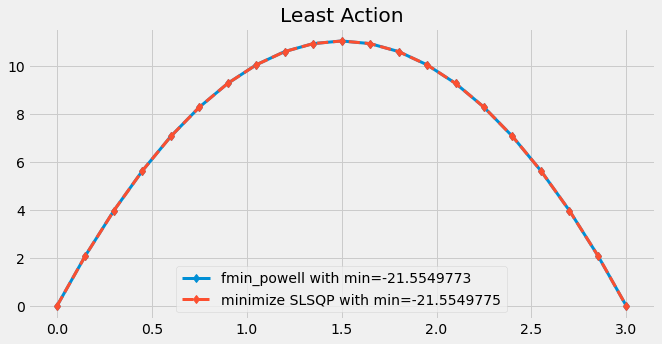

In [157]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 5))

tn = np.linspace(0, t, n)

ax.plot(tn, x, lw=3, marker='d', label=f'fmin_powell with min={Smin:.7f}')
ax.plot(tn, x_v2, ls='--', lw =3, marker='d', label=f'minimize SLSQP with min={Smin_v2:.7f}')
ax.set_title('Least Action')
ax.legend()